# FairPredictor Examples
This file contains demo code for an extended version of the example in Readme.md (additionally handling more fairness over multiple groups),  and enforcing a range of fairness definition on COMPAS.

FairPredictor is a postprocessing approach for enforcing fairness, with support for a wide range of performance metrics and fairness criteria, and support for inferred attributes, i.e. it does not require access to protected attributes at test time. 
Under the hood, FairPredictor works by adjusting the decision boundary for each group individually. Where groups are not available, it makes use of inferred group membership to adjust decision boundaries.

The key idea underlying this toolkit is that for a wide range of use cases, the most suitable classifier should do more than maximize some form of accuracy.
We offer a general toolkit that allows different measures to be optimized and additional constraints to be imposed by tuning the behavior of a binary predictor on validation data.

For example, classifiers can be tuned to maximize performance for a wide range of metrics such as:

* Accuracy
* Balanced Accuracy
* F1 score
* MCC
* Custom utility functions

While also approximately satisfying a wide range of group constraints such as:

* Demographic Parity (The idea that positive decisions should occur at the same rates for all protected groups, for example for men at the same rate as for women)
* Equal Opportunity (The recall should be the same for all protected groups)
* Minimum recall constraints (The recall should be above a particular level for all groups)
* Minimum Precision constraints (The precision should be above a particular level for all groups)
* Custom Fairness Metrics

The full set of constraints and objectives can be seen in Readme.md 

In [1]:
# Load and train a baseline classifier

from autogluon.tabular import TabularDataset, TabularPredictor
from autogluon.fair import FairPredictor 
from autogluon.fair.utils import group_metrics as gm
train_data = TabularDataset('https://autogluon.s3.amazonaws.com/datasets/Inc/train.csv')
test_data = TabularDataset('https://autogluon.s3.amazonaws.com/datasets/Inc/test.csv')
predictor = TabularPredictor(label='class').fit(train_data=train_data)

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No path specified. Models will be saved in: "AutogluonModels/ag-20221207_153238/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20221207_153238/"
AutoGluon Version:  0.6.1b20221207
Python Version:     3.9.15
Operating System:   Darwin
Platform Machine:   x86_64
Platform Version:   Darwin Kernel Version 21.6.0: Thu Sep 29 20:12:57 PDT 2022; root:xnu-8020.240.7~1/RELEASE_X86_64
Train Data Rows:    39073
Train Data Columns: 14
Label Column: class
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [' <=50K', ' >50K']
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter dur

In [2]:
# Modify predictor to enforce fairness over the train_data with respect to groups given by the column 'sex'
fpredictor = FairPredictor(predictor,train_data,'sex')
# Maximize accuracy while enforcing that the demographic parity (the difference in positive decision rates between men and women is at most 0.02)
fpredictor.fit(gm.accuracy,gm.demographic_parity,0.02)

[W ParallelNative.cpp:214] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)


In [3]:
# Evaluate on test data
fpredictor.predict(test_data)

[W ParallelNative.cpp:214] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)


0        <=50K
1        <=50K
2         >50K
3        <=50K
4        <=50K
         ...  
9764     <=50K
9765     <=50K
9766     <=50K
9767     <=50K
9768     <=50K
Length: 9769, dtype: object

In [4]:
# Evaluate a range of performance measures, and compare against original classifier on test data
fpredictor.evaluate(test_data, verbose=True)

[W ParallelNative.cpp:214] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:214] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)


,original,updated
Accuracy,0.874501,0.851059
Balanced Accuracy,0.794690,0.757776
F1 score,0.708512,0.648975
MCC,0.634991,0.562474
Precision,0.789195,0.736180
Recall,0.642796,0.580242
roc_auc,0.930278,0.817604


In [5]:
# Evaluate a range of performance measures, and compare against original classifier on test data
fpredictor.evaluate(test_data, verbose=True)

[W ParallelNative.cpp:214] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:214] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)


,original,updated
Accuracy,0.874501,0.851059
Balanced Accuracy,0.794690,0.757776
F1 score,0.708512,0.648975
MCC,0.634991,0.562474
Precision,0.789195,0.736180
Recall,0.642796,0.580242
roc_auc,0.930278,0.817604


In [6]:
# Evaluate against a range of standard fairness definitions and compare against original classifier on test data
fpredictor.evaluate_fairness(test_data, verbose=True)

[W ParallelNative.cpp:214] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:214] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)


,original,updated
Class Imbalance,0.195913,0.195913
Demographic Parity,0.169433,0.003617
Disparate Impact,0.323102,0.980901
Maximal Group Difference in Accuracy,0.098900,0.057692
Maximal Group Difference in Recall,0.053157,0.338102
Maximal Group Difference in Conditional Acceptance Rate,0.115600,1.065447
Maximal Group Difference in Acceptance Rate,0.004700,0.371785
Maximal Group Difference in Specificity,0.057236,0.071425
Maximal Group Difference in Conditional Rejectance Rate,0.041826,0.245513
Maximal Group Difference in Rejection Rate,0.094237,0.157882


In [7]:
# Evaluate a range of performance measures per group, and compare against original classifier on test data
fpredictor.evaluate_groups(test_data, verbose=True, return_original=True)

[W ParallelNative.cpp:214] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:214] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)


Accuracy  Balanced Accuracy  F1 score       MCC  \
         Groups                                                                
original Overall             0.874501           0.794690  0.708512  0.634991   
          Female             0.940103           0.789500  0.681745  0.657332   
          Male               0.841204           0.787461  0.713131  0.610049   
         Maximum difference  0.098900           0.002040  0.031386  0.047283   
updated  Overall             0.851059           0.757776  0.648975  0.562474   
          Female             0.889328           0.879443  0.627049  0.599470   
          Male               0.831636           0.746104  0.655727  0.581693   
         Maximum difference  0.057692           0.133339  0.028678  0.017778   

                             Precision    Recall   roc_auc  \
         Groups                                              
original Overall              0.789195  0.642796  0.930278   
          Female              0.793233  0.597734  0.948686   
          Male                0.788533  0.650891  0.911427   
         Maximum difference   0.004700  0.053157  0.037259   
updated  Overall              0.736180  0.580242  0.817604   
          Female              0.491172  0.866856  0.948686   
          Male                0.862957  0.528753  0.911427   
         Maximum difference   0.371785  0.338102  0.037259   

                             Number of Datapoints  Positive Count  \
         Groups                                                     
original Overall                           9769.0          2318.0   
          Female                           3289.0           353.0   
          Male                             6480.0          1965.0   
         Maximum difference                3191.0          1612.0   
updated  Overall                           9769.0          2318.0   
          Female                           3289.0           353.0   
          Male                             6480.0          1965.0   
         Maximum difference                3191.0          1612.0   

                             Negative Count  Positive Label Rate  \
         Groups                                                    
original Overall                     7451.0             0.237281   
          Female                     2936.0             0.107327   
          Male                       4515.0             0.303241   
         Maximum difference          1579.0             0.195913   
updated  Overall                     7451.0             0.237281   
          Female                     2936.0             0.107327   
          Male                       4515.0             0.303241   
         Maximum difference          1579.0             0.195913   

                             Positive Prediction Rate  
         Groups                                        
original Overall                             0.193264  
          Female                             0.080876  
          Male                               0.250309  
         Maximum difference                  0.169433  
updated  Overall                             0.187020  
          Female                             0.189419  
          Male                               0.185802  
         Maximum difference                  0.003617

In [8]:
#We can repeat the same analysis using the feature 'race' instead of 'sex'
fpredictor = FairPredictor(predictor,train_data, 'race')
# Maximize accuracy while enforcing that the demographic parity (the difference in positive decision rates between men and women is at most 0.02)
fpredictor.fit(gm.accuracy, gm.demographic_parity, .02)

[W ParallelNative.cpp:214] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)


In [9]:
# Unlike the previous case, we find that demographic parity is still high on test data, although it is improved.
fpredictor.evaluate_fairness(test_data, verbose=True)

[W ParallelNative.cpp:214] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:214] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)


,original,updated
Class Imbalance,0.163744,0.163744
Demographic Parity,0.151573,0.096357
Disparate Impact,0.272973,0.589214
Maximal Group Difference in Accuracy,0.091463,0.048780
Maximal Group Difference in Recall,0.103859,0.393506
Maximal Group Difference in Conditional Acceptance Rate,0.357061,1.045113
Maximal Group Difference in Acceptance Rate,0.103044,0.325330
Maximal Group Difference in Specificity,0.050832,0.101004
Maximal Group Difference in Conditional Rejectance Rate,0.025442,0.245520
Maximal Group Difference in Rejection Rate,0.073001,0.120072


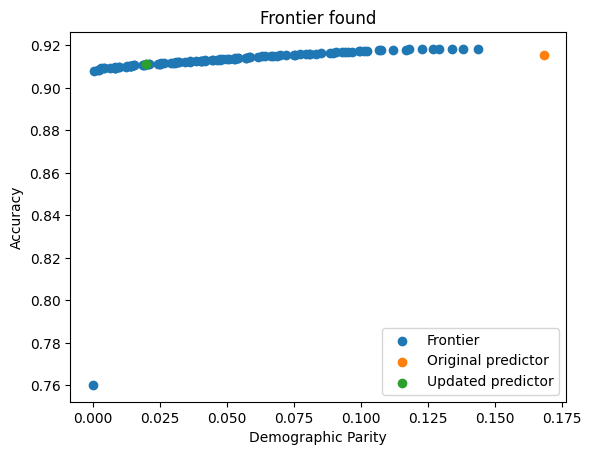

In [10]:
#To debug this, we can look at the Pareto Frontier of solutions considered, on the training set
fpredictor.plot_frontier() 

[W ParallelNative.cpp:214] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)


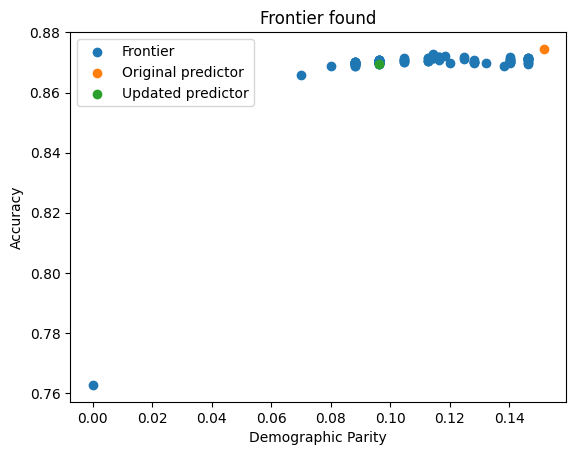

In [11]:
#and on the test set
fpredictor.plot_frontier(test_data) 

In [12]:
#We find that the demographic parity is very different on test data for a range of solutions found.
#By looking at the per group decomposition, we can find out why.
fpredictor.evaluate_groups(test_data, verbose=True)

[W ParallelNative.cpp:214] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)


,Accuracy,Balanced Accuracy,F1 score,MCC,Precision,Recall,roc_auc,Number of Datapoints,Positive Count,Negative Count,Positive Label Rate,Positive Prediction Rate
Groups,,,,,,,,,,,,
Overall,0.869383,0.798170,0.706532,0.625270,0.756650,0.662640,0.904007,9769.0,2318.0,7451.0,0.237281,0.207800
Amer-Indian-Eskimo,0.902439,0.823458,0.571429,0.534904,0.470588,0.727273,0.945617,123.0,11.0,112.0,0.089431,0.138211
Asian-Pac-Islander,0.853659,0.733326,0.619048,0.554851,0.795918,0.506493,0.904848,328.0,77.0,251.0,0.234756,0.149390
Black,0.890011,0.876973,0.652482,0.616900,0.525714,0.859813,0.953176,891.0,107.0,784.0,0.120090,0.196409
Other,0.864198,0.879577,0.620690,0.589369,0.473684,0.900000,0.954930,81.0,10.0,71.0,0.123457,0.234568
White,0.867362,0.797800,0.714911,0.633556,0.784181,0.656886,0.927211,8346.0,2113.0,6233.0,0.253175,0.212078
Maximum difference,0.048780,0.146251,0.143483,0.098652,0.325330,0.393506,0.050081,8265.0,2103.0,6162.0,0.163744,0.096357


In [13]:
#The groups with the smallest Positive Prediction Rate (American-Indian-Eskimo, and Asian-Pacific-Islander) 
# only have around 100-300 samples making it impossible to accurately evaluate demographic parity, while the
# group labelled 'Other' has even less data.
# Moreover, on training data we find that there are less than 350 people identified as American-Indian-Eskimo, 
# meaning that it is not possible to predict if the positive prediction rate will hold on new data. 
fpredictor.evaluate_groups(verbose=True)

[W ParallelNative.cpp:214] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)


,Accuracy,Balanced Accuracy,F1 score,MCC,Precision,Recall,roc_auc,Number of Datapoints,Positive Count,Negative Count,Positive Label Rate,Positive Prediction Rate
Groups,,,,,,,,,,,,
Overall,0.911166,0.862549,0.805905,0.749919,0.846371,0.769132,0.958577,39073.0,9369.0,29704.0,0.239782,0.217900
Amer-Indian-Eskimo,0.925072,0.957096,0.771930,0.758047,0.628571,1.000000,0.994674,347.0,44.0,303.0,0.126801,0.201729
Asian-Pac-Islander,0.924433,0.873697,0.848485,0.809016,0.961832,0.759036,0.982152,1191.0,332.0,859.0,0.278757,0.219983
Black,0.919610,0.952394,0.749795,0.737202,0.601316,0.995643,0.990321,3794.0,459.0,3335.0,0.120980,0.200316
Other,0.920000,0.954386,0.754717,0.742139,0.606061,1.000000,0.994825,325.0,40.0,285.0,0.123077,0.203077
White,0.909504,0.858583,0.809211,0.753631,0.871805,0.755004,0.971215,33416.0,8494.0,24922.0,0.254190,0.220134
Maximum difference,0.015568,0.098513,0.098690,0.071814,0.360516,0.244996,0.023609,33091.0,8454.0,24637.0,0.157777,0.019818


## Fairness on COMPAS using Inferred Attributes

We demonstrate how to enforce a wide range of fairness definitions on the COMPAS dataset. This dataset records paroles caught violating the terms of parole. As it measures who was caught, it is strongly influenced by policing and environmental biases, and should not be confused with a measurement of who actually violated their terms of parole. See [this paper](https://datasets-benchmarks-proceedings.neurips.cc/paper/2021/file/92cc227532d17e56e07902b254dfad10-Paper-round1.pdf) for a discussion of its limitations and caveats. 
We use it because it is a standard fairness dataset that captures such strong differences in outcome between people identified as African-American and everyone else, that classifiers trained on this dataset violate most definitions of fairness.

As many of the ethnic groups are too small for reliable statistical estimation, we only consider differences is in outcomes between African-Americans vs. everyone else (labeled as other).
We load and preprocess the COMPAS dataset, splitting it into three roughly equal partitions of train, validation, and test:

In [14]:
import numpy as np
import pandas as pd
from autogluon.fair import inferred_attribute_builder
all_data = pd.read_csv('https://github.com/propublica/compas-analysis/raw/master/compas-scores-two-years.csv')
condensed_data=all_data[['sex','race','age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count', 'age_cat', 'c_charge_degree','two_year_recid']].copy()
condensed_data.replace({'Caucasian':'Other', 'Hispanic':'Other', 'Native American':'Other', 'Asian':'Other'},inplace=True)
train=condensed_data.sample(frac=0.3, random_state=0)
val_and_test=condensed_data.drop(train.index)
val=val_and_test.sample(frac=0.5, random_state=0)
test=val_and_test.drop(val.index)

In [15]:
# To enforce fairness constraints without access to protected attributes at test time, we train two classifiers to infer the 2-year recidivism rate, and ethnicity.
  
predictor2, protected = inferred_attribute_builder(train, 'two_year_recid', 'race')


No path specified. Models will be saved in: "AutogluonModels/ag-20221207_153607/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20221207_153607/"
AutoGluon Version:  0.6.1b20221207
Python Version:     3.9.15
Operating System:   Darwin
Platform Machine:   x86_64
Platform Version:   Darwin Kernel Version 21.6.0: Thu Sep 29 20:12:57 PDT 2022; root:xnu-8020.240.7~1/RELEASE_X86_64
Train Data Rows:    2164
Train Data Columns: 8
Label Column: two_year_recid
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerato

In [16]:
# From these a single predictor that maximizes acuracy while reducing the demographic parity violation to less than 2.5% can be trained by running:

fpredictor=FairPredictor(predictor2, val, 'race', inferred_groups=protected)
fpredictor.fit(gm.accuracy, gm.demographic_parity, 0.025)

[W ParallelNative.cpp:214] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:214] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:214] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)


In [17]:
#However, instead we will show how a family of fairness measures can be individually optimized. 
# The following code plots a table showing the change in accuracy and the fairness measure on a held-out test set as we decrease
# the fairness measure to less than 0.025 for all measures except for disparate impact which we raise to above 0.975.
# We define a helper function for evaluation:

def evaluate(fpredictor,use_metrics):
    "Print a table showing the accuracy drop that comes with enforcing fairness"
    extra_metrics= {**use_metrics, 'accuracy':gm.accuracy}
    collect=pd.DataFrame(columns=['Measure (original)', 'Measure (updated)', 'Accuracy (original)', 'Accuracy (updated)'])
    for d in use_metrics.items():
        if d[1].greater_is_better is False:
            fpredictor.fit(gm.accuracy,d[1], 0.025)
        else:
            fpredictor.fit(gm.accuracy,d[1], 1-0.025)
        tmp=fpredictor.evaluate_fairness(test,metrics=extra_metrics)
        collect.loc[d[1].name]=np.concatenate((np.asarray(tmp.loc[d[0]]), np.asarray(tmp.loc['accuracy'])), 0)
    return collect

In [18]:
#We can now contrast the behavior of a fair classifier that relies on access to the protected
# attribtute at test time with one that infers it.

# we first create a classifer using the protected attribute
predictor=TabularPredictor(label='two_year_recid').fit(train_data=train)

No path specified. Models will be saved in: "AutogluonModels/ag-20221207_153622/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20221207_153622/"
AutoGluon Version:  0.6.1b20221207
Python Version:     3.9.15
Operating System:   Darwin
Platform Machine:   x86_64
Platform Version:   Darwin Kernel Version 21.6.0: Thu Sep 29 20:12:57 PDT 2022; root:xnu-8020.240.7~1/RELEASE_X86_64
Train Data Rows:    2164
Train Data Columns: 9
Label Column: two_year_recid
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerato

In [19]:
#Create a fair predictor object, using the attribute 'race' on validation data
fpredictor = FairPredictor(predictor, val, 'race')
#and then evaluate it
evaluate(fpredictor, gm.clarify_metrics)
#Note that Class Imbalance is a property of the dataset and can not be altered.

[W ParallelNative.cpp:214] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:214] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
No solutions satisfy the constraint found, selecting the closest solution
[W ParallelNative.cpp:214] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:214] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:214] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call whe

,Measure (original),Measure (updated),Accuracy (original),Accuracy (updated)
Class Imbalance,0.132203,0.132203,0.669307,0.666139
Demographic Parity,0.325463,0.013379,0.669307,0.670099
Disparate Impact,0.438751,0.986853,0.669307,0.645149
Maximal Group Difference in Accuracy,0.051849,0.035223,0.669307,0.669703
Maximal Group Difference in Recall,0.286954,0.043479,0.669307,0.665743
Maximal Group Difference in Conditional Acceptance Rate,0.599684,0.051112,0.669307,0.681584
Maximal Group Difference in Acceptance Rate,0.008864,0.054906,0.669307,0.662178
Maximal Group Difference in Specificity,0.288219,0.049785,0.669307,0.678812
Maximal Group Difference in Conditional Rejectance Rate,0.334529,0.046178,0.669307,0.678416
Maximal Group Difference in Rejection Rate,0.052565,0.038439,0.669307,0.671287


In [21]:
 # Now using infered attributes
fpredictor2 = FairPredictor(predictor2, val, 'race', inferred_groups=protected)
evaluate(fpredictor2, gm.clarify_metrics)

[W ParallelNative.cpp:214] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:214] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:214] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
No solutions satisfy the constraint found, selecting the closest solution
[W ParallelNative.cpp:214] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:214] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call whe

,Measure (original),Measure (updated),Accuracy (original),Accuracy (updated)
Class Imbalance,0.132203,0.132203,0.680792,0.677228
Demographic Parity,0.217807,0.033052,0.680792,0.581782
Disparate Impact,0.564046,0.602585,0.680792,0.564752
Maximal Group Difference in Accuracy,0.013400,0.014385,0.680792,0.686733
Maximal Group Difference in Recall,0.212047,0.057136,0.680792,0.571881
Maximal Group Difference in Conditional Acceptance Rate,0.315828,0.021545,0.680792,0.602772
Maximal Group Difference in Acceptance Rate,0.070319,0.082540,0.680792,0.573465
Maximal Group Difference in Specificity,0.147527,0.051987,0.680792,0.623366
Maximal Group Difference in Conditional Rejectance Rate,0.114469,0.000478,0.680792,0.670099
Maximal Group Difference in Rejection Rate,0.050822,0.064287,0.680792,0.677228
